In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# from sklearn.externals import joblib
import joblib
from ast import literal_eval

**Content** <br>
This dataset consists of the following files:

movies_metadata.csv: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

keywords.csv: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

credits.csv: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

links.csv: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

links_small.csv: Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

ratings_small.csv: The subset of 100,000 ratings from 700 users on 9,000 movies.

# metadata
- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- id - This is infact the movie_id as in the first dataset.
- keywords - The keywords or tags related to the movie.
- original_language - The language in which the movie was made.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- status - "Released" or "Rumored".
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_average - average ratings the movie recieved.
- vote_count - the count of votes recieved.

## Data 불러오기

In [3]:
data = pd.read_csv('./dataset/movies_metadata.csv')
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Data 훑어보기

In [4]:
data.shape

(45466, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
isnull_sum = data.isnull().sum()
isnull_sum[isnull_sum > 0].sort_values(ascending=False)

belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
release_date                87
status                      87
imdb_id                     17
original_language           11
spoken_languages             6
revenue                      6
vote_average                 6
title                        6
video                        6
vote_count                   6
popularity                   5
production_countries         3
production_companies         3
dtype: int64

In [7]:
isnull_sum[isnull_sum > 0].shape

(19,)

In [8]:
(isnull_sum[isnull_sum > 0] / len(data) * 100).sort_values(ascending=False)

belongs_to_collection    90.115691
homepage                 82.883913
tagline                  55.104914
overview                  2.098271
poster_path               0.848986
runtime                   0.578454
release_date              0.191352
status                    0.191352
imdb_id                   0.037391
original_language         0.024194
spoken_languages          0.013197
revenue                   0.013197
vote_average              0.013197
title                     0.013197
video                     0.013197
vote_count                0.013197
popularity                0.010997
production_countries      0.006598
production_companies      0.006598
dtype: float64

### 각 column 확인

In [9]:
columns_use = []
columns_tbd = []

In [10]:
def simple_column_check(data, i) :
    print('column name :', data.columns[i], '\n')
    print(data[data.columns[i]].value_counts(), '\n')
    print('num of null :' ,data[data.columns[i]].isnull().sum())
    print('ratio of null :', round(data[data.columns[i]].isnull().sum() / len(data) * 100, 1), '%')

#### adult(?)
- 성인 영화인가 아닌가를 구분
- 2 missmatch
- 9개의 성인 영화를 제외하면 모두 False -> 사용할 것인가?

In [11]:
simple_column_check(data, 0)

column name : adult 

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64 

num of null : 0
ratio of null : 0.0 %


In [12]:
data[data.adult == 'True']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19489,True,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,5422,tt0079642,it,Le notti erotiche dei morti viventi,A sailor takes an American businessman and his...,...,1980-11-18,0.0,112.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Erotic Nights of the Living Dead,False,2.2,7.0
28701,True,NaN,0,"[{'id': 80, 'name': 'Crime'}]",http://www.imdb.com/title/tt0119931/,169158,tt0119931,en,Standoff,The FBI and Texas police make ready to storm t...,...,1998-01-11,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Trust Will Get You Killed,Standoff,False,4.8,5.0
31934,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,44781,tt0322232,cn,發電悄嬌娃,Electrical Girl centers around a horny young w...,...,2001-04-26,0.0,89.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}]",Released,NaN,Electrical Girl,False,0.0,0.0
32113,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dietofsex.com/,324230,tt3094816,es,Diet of Sex,Ágata suffers from a psychological disorder wh...,...,2014-02-14,0.0,72.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,"Comedy, food, drama and sex, a lot of sex",Diet of Sex,False,4.0,12.0
39901,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,35731,tt1161951,en,Amateur Porn Star Killer 2,Shane Ryan's sequel to the disturbing Amateur ...,...,2008-05-13,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Humiliation. Rape. Murder. You know the drill.,Amateur Porn Star Killer 2,False,6.3,8.0
39902,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,55774,tt1153101,en,The Band,Australian film about a fictional sub-par Aust...,...,2009-11-17,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Sex, drugs and Rock 'n Roll",The Band,False,3.3,7.0
40574,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,39922,tt0070696,da,Dværgen,Olaf and his mother run a boarding house and a...,...,1973-12-20,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Mother of all Dwarfsploitation films!,The Sinful Dwarf,False,5.8,13.0
41009,True,NaN,750000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,376004,tt4044464,en,Adulterers,A man who returns home to find his wife cheati...,...,2016-01-05,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love. Betrayal. Vengeance,Adulterers,False,5.2,16.0
43090,True,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,448290,tt2697688,en,Half -Life,An American scientific research facility opens...,...,NaN,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",In Production,NaN,Half -Life,False,3.7,3.0


In [13]:
columns_tbd.append(data.columns[0])

#### belongs_to_collection(X)
- 어떤 data인지 이해되지 않음
- 누락값이 90%가 넘음

In [14]:
simple_column_check(data, 1)

column name : belongs_to_collection 

{'id': 415931, 'name': 'The Bowery Boys', 'poster_path': '/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg', 'backdrop_path': '/foe3kuiJmg5AklhtD3skWbaTMf2.jpg'}                 29
{'id': 421566, 'name': 'Totò Collection', 'poster_path': '/4ayJsjC3djGwU9eCWUokdBWvdLC.jpg', 'backdrop_path': '/jaUuprubvAxXLAY5hUfrNjxccUh.jpg'}                 27
{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}               26
{'id': 96887, 'name': 'Zatôichi: The Blind Swordsman', 'poster_path': '/8Q31DAtmFJjhFTwQGXghBUCgWK2.jpg', 'backdrop_path': '/bY8gLImMR5Pr9PaG3ZpobfaAQ8N.jpg'}    26
{'id': 37261, 'name': 'The Carry On Collection', 'poster_path': '/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg', 'backdrop_path': '/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg'}          25
                                                                                                                                         

In [15]:
data[data['title'] == 'The Bowery Boys']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [16]:
data.loc[0, 'belongs_to_collection']

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [17]:
data['poster_path'][0]

'/rhIRbceoE9lR4veEXuwCC2wARtG.jpg'

#### budget (X)
- 영화 추천에 예산은 불필요해 보임

In [18]:
simple_column_check(data, 2)

column name : budget 

0            36573
5000000        286
10000000       259
20000000       243
2000000        242
             ...  
33157            1
5037000          1
1052753          1
858000           1
107000000        1
Name: budget, Length: 1226, dtype: int64 

num of null : 0
ratio of null : 0.0 %


#### genres (O)
- 자료 구조가 list이며, list 안은 dictionary로 이루어짐
- Dictionary의 id는 장르의 id, name은 장르 name
- 여러 장르로 분류되기도 함

In [19]:
simple_column_check(data, 3)

column name : genres 

[{'id': 18, 'name': 'Drama'}]                                                                                                                                       5000
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                      3621
[{'id': 99, 'name': 'Documentary'}]                                                                                                                                 2723
[]                                                                                                                                                                  2442
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                     1301
                                                                                                                                    

In [20]:
columns_use.append(data.columns[3])

#### homepage (X)

In [21]:
simple_column_check(data, 4)

column name : homepage 

http://www.georgecarlin.com                                   12
http://www.wernerherzog.com/films-by.html                      7
http://breakblade.jp/                                          6
http://www.thehungergames.movie/                               4
http://phantasm.com                                            4
                                                              ..
https://www.facebook.com/WrathOfVajraMovie                     1
http://www.forbiddenkingdommovie.com/                          1
http://www.mimzy.com                                           1
http://www.benlewis.tv/films/films_hat/hammer-tickle-film/     1
http://www.ocean-films.com/threetimes/                         1
Name: homepage, Length: 7673, dtype: int64 

num of null : 37684
ratio of null : 82.9 %


#### id (O) : 중복 data 존재
- tmdb id
- imdb_id 중복
- title과 중복되지 않음, 동일명의 영화 존재
- 중복 data 존재
- 영화 추천에 필요한 data인가?

In [22]:
simple_column_check(data, 5)

column name : id 

141971    3
298721    2
84198     2
97995     2
13209     2
         ..
24615     1
376823    1
143117    1
205466    1
51836     1
Name: id, Length: 45436, dtype: int64 

num of null : 0
ratio of null : 0.0 %


In [23]:
len(data.id.unique())

45436

In [24]:
data[data.id == '141971']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13261,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
13375,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
16764,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0


In [25]:
data[data.id == '298721']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
33184,False,NaN,980000,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",NaN,298721,tt2818654,th,รักที่ขอนแก่น,"In a hospital, ten soldiers are being treated ...",...,2015-09-02,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Cemetery of Splendour,False,4.4,50.0
40040,False,NaN,980000,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",NaN,298721,tt2818654,th,รักที่ขอนแก่น,"In a hospital, ten soldiers are being treated ...",...,2015-09-02,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Cemetery of Splendour,False,4.4,50.0


In [26]:
data[data['original_title'] == 'Blackout']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13261,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
13375,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
16764,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
22682,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,100063,tt0077241,en,Blackout,A black comedy of violent criminals who terror...,...,1978-08-25,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The night the power failed.... and the shock b...,Blackout,False,5.0,1.0
23567,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,226630,tt0088816,en,Blackout,A police officer suspects that a local husband...,...,1985-07-28,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His obsession would become her nightmare.,Blackout,False,4.4,5.0
43820,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.pbs.org/wgbh/americanexperience/fil...,416951,tt4284046,en,Blackout,"First responders, journalists, shop owners, th...",...,2015-07-14,0.0,53.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Blackout,False,6.7,3.0


In [27]:
columns_use.append(data.columns[5])

#### imdb_id (X) : id와 중복
- id와 중복되므로, 두 column 중 하나는 사용 안함
- mismatch data 존재

In [28]:
simple_column_check(data, 6)

column name : imdb_id 

0            3
tt1180333    3
tt0067306    2
tt2818654    2
tt0082992    2
            ..
tt0061404    1
tt0451090    1
tt0424345    1
tt0051840    1
tt0421729    1
Name: imdb_id, Length: 45417, dtype: int64 

num of null : 17
ratio of null : 0.0 %


#### original_language (O) : mismatch, null
- mismatch data 존재
- null 존재

In [29]:
simple_column_check(data, 7)

column name : original_language 

en      32269
fr       2438
it       1529
ja       1350
de       1080
        ...  
si          1
lb          1
82.0        1
fy          1
rw          1
Name: original_language, Length: 92, dtype: int64 

num of null : 11
ratio of null : 0.0 %


In [30]:
columns_use.append(data.columns[7])

#### original_title (?)
- 영화 추천에 title이 필요한가?

In [31]:
simple_column_check(data, 8)

column name : original_title 

Hamlet                             8
Alice in Wonderland                8
Cinderella                         7
Les Misérables                     7
A Christmas Carol                  7
                                  ..
Feudin' Fools                      1
El laberinto del fauno             1
Something Wicked This Way Comes    1
April Love                         1
Weary River                        1
Name: original_title, Length: 43373, dtype: int64 

num of null : 0
ratio of null : 0.0 %


In [32]:
data[data['original_title'] == 'Hamlet']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1360,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,10549,tt0116477,en,Hamlet,"Hamlet, Prince of Denmark, returns home to fin...",...,1996-12-25,0.0,242.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hamlet,False,7.3,118.0
1832,False,NaN,750000,"[{'id': 18, 'name': 'Drama'}]",NaN,23383,tt0040416,en,Hamlet,"Winner of four Academy Awards, including Best ...",...,1948-03-25,0.0,155.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hamlet,False,7.1,48.0
3476,False,NaN,2000000,"[{'id': 18, 'name': 'Drama'}]",NaN,10688,tt0171359,en,Hamlet,Modern day adaptation of Shakespeare's immorta...,...,2000-05-12,1568749.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Passion, Betrayal, Revenge, A hostile takeover...",Hamlet,False,6.0,35.0
3601,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,10264,tt0099726,en,Hamlet,"Hamlet, Prince of Denmark, finds out that his ...",...,1990-12-19,20710451.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The extraordinary adaptation of Shakespeare's ...,Hamlet,False,6.7,95.0
13313,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,125705,tt0243951,en,Hamlet,"To be or not to be, etc.",...,2000-12-10,0.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hamlet,False,0.0,0.0
18061,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,42605,tt0064400,en,Hamlet,Tony Richardson's Hamlet is based on his own s...,...,1969-12-21,0.0,117.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,From the author of,Hamlet,False,6.1,7.0
18908,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",http://www.bbc.co.uk/hamlet/,28238,tt1449175,en,Hamlet,David Tennant stars in a film of the Royal Sha...,...,2009-12-26,0.0,185.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"To be, or not to be?",Hamlet,False,7.3,22.0
21239,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,106848,tt0080835,en,Hamlet,Hamlet comes home from university to find his ...,...,1980-05-25,0.0,210.0,[],Released,NaN,Hamlet,False,4.0,3.0


In [33]:
columns_tbd.append(data.columns[8])

#### overview (O) : null
- null 존재
- String을 어떻게 처리할지?

In [34]:
simple_column_check(data, 9)

column name : overview 

No overview found.                                                                                                                                                                                                                                                                                                                                                                                                                 133
No Overview                                                                                                                                                                                                                                                                                                                                                                                                                          7
                                                                                                                                 

In [35]:
columns_use.append(data.columns[9])

#### popularity (O) : 문자열, null
- 문자열이 포함됨
- null 존재

In [36]:
simple_column_check(data, 10)

column name : popularity 

0.0                      34
0.0                      32
1e-06                    30
0.0008439999999999999    26
1e-06                    26
                         ..
1.874722                  1
1.600885                  1
6.313297                  1
1.493787                  1
0.75                      1
Name: popularity, Length: 44176, dtype: int64 

num of null : 5
ratio of null : 0.0 %


In [37]:
# temp = data['popularity'].astype('float')   에러남(문자가 포함됨)

In [38]:
columns_use.append(data.columns[10])

#### poster_path (X)

In [39]:
simple_column_check(data, 11)

column name : poster_path 

/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg    5
/2kslZXOaW0HmnGuVPCnQlCdXFR9.jpg    4
/qW1oQlOHizRHXZQrpkimYr0oxzn.jpg    4
/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg    3
/cdwVC18URfEdQjjxqJyRMoGDC0H.jpg    3
                                   ..
/7hN9G4iilqPJFCxamyjBUaHWMX.jpg     1
/pDqjCPuyTdyspCo5XiEC2TLSVrr.jpg    1
/nFisojoKNuzg1ukHu3iTdV4rX9p.jpg    1
/eeQPYT3lDoW07LvAnwzBVU7EYJm.jpg    1
/vkzCDWvVBKegktrDYQm3LTBvcv5.jpg    1
Name: poster_path, Length: 45024, dtype: int64 

num of null : 386
ratio of null : 0.8 %


#### production_companies (?) : null
- 자료 구조가 list이며, list 안은 dictionary로 이루어짐
- Dictionary의 id는 회사의 id, name은 회사 name
- null 존재

In [40]:
simple_column_check(data, 12)

column name : production_companies 

[]                                                                                                                                                                                                                                                                                                   11875
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                                                                                                                                                                                                                    742
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                                                                                                                                                                                                 540
[{'name': 'Paramount Pictures', 'id': 4}]                         

In [41]:
columns_tbd.append(data.columns[12])

#### production_countries (X)
- 자료 구조는 production_companies와 동일
- null 존재
- original_language와 중복될 수도 있음

In [42]:
simple_column_check(data, 13)

column name : production_countries 

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                                 17851
[]                                                                                                                                                          6282
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                            2238
[{'iso_3166_1': 'FR', 'name': 'France'}]                                                                                                                    1654
[{'iso_3166_1': 'JP', 'name': 'Japan'}]                                                                                                                     1356
                                                                                                                                                           ...

In [43]:
data[['original_language', 'production_countries', 'spoken_languages']].head(30)

,original_language,production_countries,spoken_languages
0,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
1,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
3,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
5,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
6,en,"[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...","[{'iso_639_1': 'fr', 'name': 'Français'}, {'is..."
7,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
8,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
9,en,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."


#### release_date (X)
- null 존재

In [44]:
simple_column_check(data, 14)

column name : release_date 

2008-01-01    136
2009-01-01    121
2007-01-01    118
2005-01-01    111
2006-01-01    101
             ... 
1950-07-01      1
1958-07-02      1
1963-01-09      1
1951-04-07      1
1953-10-29      1
Name: release_date, Length: 17336, dtype: int64 

num of null : 87
ratio of null : 0.2 %


#### revenue (X)
- null 존재

In [45]:
simple_column_check(data, 15)

column name : revenue 

0.0            38052
12000000.0        20
10000000.0        19
11000000.0        19
2000000.0         18
               ...  
245724603.0        1
12212123.0         1
8203235.0          1
25900.0            1
12032983.0         1
Name: revenue, Length: 6863, dtype: int64 

num of null : 6
ratio of null : 0.0 %


#### runtime (X)
- null 존재

In [46]:
simple_column_check(data, 16)

column name : runtime 

90.0      2556
0.0       1558
100.0     1470
95.0      1412
93.0      1214
          ... 
238.0        1
316.0        1
258.0        1
780.0        1
1256.0       1
Name: runtime, Length: 353, dtype: int64 

num of null : 263
ratio of null : 0.6 %


#### spoken_languages (O) : null 존재
- 더빙인가?
- null 존재

In [47]:
simple_column_check(data, 17)

column name : spoken_languages 

[{'iso_639_1': 'en', 'name': 'English'}]                                                                                                                            22395
[]                                                                                                                                                                   3829
[{'iso_639_1': 'fr', 'name': 'Français'}]                                                                                                                            1853
[{'iso_639_1': 'ja', 'name': '日本語'}]                                                                                                                                 1289
[{'iso_639_1': 'it', 'name': 'Italiano'}]                                                                                                                            1218
                                                                                                                     

In [48]:
data[['original_language', 'spoken_languages']].head(30)

,original_language,spoken_languages
0,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
4,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
5,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
6,en,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is..."
7,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
8,en,"[{'iso_639_1': 'en', 'name': 'English'}]"
9,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."


In [49]:
columns_use.append(data.columns[17])

#### status (X)
- null 존재

In [50]:
simple_column_check(data, 18)

column name : status 

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64 

num of null : 87
ratio of null : 0.2 %


#### tagline (X)
- null 비율이 너무 큼
- overview와 겹칠 수도 있음

In [51]:
simple_column_check(data, 19)

column name : tagline 

Based on a true story.                                          7
Trust no one.                                                   4
-                                                               4
Be careful what you wish for.                                   4
The end is near.                                                3
                                                               ..
A man with a secret. A woman with a past.                       1
The end is HERE!                                                1
The family will never be the same.                              1
He rules the streets from inside...                             1
High School Honor Student by Day. Hollywood Hooker by Night.    1
Name: tagline, Length: 20283, dtype: int64 

num of null : 25054
ratio of null : 55.1 %


#### title (O) : null
- null 존재

In [52]:
simple_column_check(data, 20)

column name : title 

Cinderella                     11
Alice in Wonderland             9
Hamlet                          9
Les Misérables                  8
Beauty and the Beast            8
                               ..
Hooking Up                      1
Ernest Goes to School           1
The All Together                1
Soundtrack for a Revolution     1
Weary River                     1
Name: title, Length: 42277, dtype: int64 

num of null : 6
ratio of null : 0.0 %


In [53]:
data[data['title'] == 'Cinderella']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
993,False,"{'id': 55419, 'name': 'Cinderella Collection',...",2900000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/cinderella-1950,11224,tt0042332,en,Cinderella,Cinderella has faith her dreams of a better li...,...,1950-03-04,263591415.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest love story ever told.,Cinderella,False,6.8,1760.0
13076,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 107...",NaN,42884,tt0128996,en,Cinderella,Updated version of the classic Rodgers and Ham...,...,1997-11-02,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Cinderella,False,6.1,28.0
23507,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,92349,tt0003772,en,Cinderella,Based on Charles Perrault's fairy tale: Cinder...,...,1914-12-28,0.0,52.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Cinderella,False,5.4,7.0
23518,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,105875,tt0910852,en,Cinderella,"Cinderella, the beautiful and kind-hearted rag...",...,2002-08-06,0.0,48.0,"[{'iso_639_1': 'af', 'name': 'Afrikaans'}]",Released,The version children love!,Cinderella,False,6.0,2.0
28391,False,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 10770...",http://www.betafilm.com/en/product/do/detail.h...,261985,tt1781790,en,Cenerentola,Once upon a time in post-war Rome: 13-year old...,...,2011-10-30,0.0,180.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Cinderella,False,5.3,9.0
28664,False,NaN,95000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",http://movies.disney.com/cinderella,150689,tt1661199,en,Cinderella,"When her father unexpectedly passes away, youn...",...,2015-03-12,543514353.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Midnight is just the beginning.,Cinderella,False,6.7,2426.0
34254,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,42651,tt0168269,ru,Zolushka,"Based on a classic fairytale ""Cinderella"" bril...",...,1947-11-28,0.0,80.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Cinderella,False,4.8,5.0
35593,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,44459,tt0129672,en,Cinderella,The first of three TV-versions of the classic ...,...,1957-03-31,0.0,77.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Cinderella,False,5.9,5.0
35595,False,NaN,0,[],NaN,289673,tt0218891,en,Cinderella,Cinderella (named Zezolla) and her family live...,...,2000-01-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Cinderella,False,5.6,5.0
41074,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",NaN,114108,tt0000230,fr,Cendrillon,A fairy godmother magically turns Cinderella's...,...,1899-10-01,0.0,5.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Cinderella,False,5.5,19.0


In [54]:
columns_use.append(data.columns[20])

#### video (X)
- null 존재

In [55]:
simple_column_check(data, 21)

column name : video 

False    45367
True        93
Name: video, dtype: int64 

num of null : 6
ratio of null : 0.0 %


#### vote_average (O) : null
- null 존재

In [56]:
simple_column_check(data, 22)

column name : vote_average 

0.0    2998
6.0    2468
5.0    2001
7.0    1886
6.5    1722
       ... 
9.4       3
9.8       1
0.7       1
9.6       1
1.1       1
Name: vote_average, Length: 92, dtype: int64 

num of null : 6
ratio of null : 0.0 %


In [57]:
data['vote_average'].dtype

dtype('float64')

<AxesSubplot:>

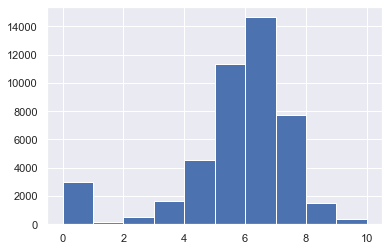

In [58]:
data['vote_average'].hist()

In [59]:
columns_use.append(data.columns[22])

#### vote_count (O) : null
- null 존재

In [60]:
simple_column_check(data, 23)

column name : vote_count 

1.0       3264
2.0       3132
0.0       2899
3.0       2787
4.0       2480
          ... 
4461.0       1
1085.0       1
1539.0       1
2487.0       1
3086.0       1
Name: vote_count, Length: 1820, dtype: int64 

num of null : 6
ratio of null : 0.0 %


In [61]:
data['vote_count'].dtype

dtype('float64')

<AxesSubplot:>

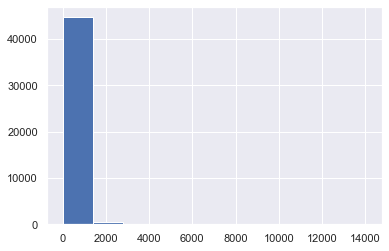

In [62]:
data['vote_count'].hist()

In [63]:
columns_use.append(data.columns[23])

## Object dump

In [64]:
joblib.dump(columns_use, "./dataset/metadata_columns_use.pkl")
joblib.dump(columns_tbd, "./dataset/metadata_columns_tbd.pkl")

['./dataset/metadata_columns_tbd.pkl']

# credits

## Data 불러오기

In [65]:
data = pd.read_csv('./dataset/credits.csv')
data.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


## Data 훑어보기

In [66]:
data.shape

(45476, 3)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [68]:
data.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

### 각 column 확인

In [69]:
columns_use = []
columns_tbd = []

#### cast (O)
- 배우를 뽑아낼 수 있음

In [70]:
data.iloc[0, 0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [71]:
data['cast'] = data['cast'].apply(literal_eval)
data['crew'] = data['crew'].apply(literal_eval)

In [72]:
data.iloc[0, 0]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [73]:
data.iloc[0, 0][0]['name']

'Tom Hanks'

In [74]:
data.iloc[1, 0]

[{'cast_id': 1,
  'character': 'Alan Parrish',
  'credit_id': '52fe44bfc3a36847f80a7c73',
  'gender': 2,
  'id': 2157,
  'name': 'Robin Williams',
  'order': 0,
  'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'},
 {'cast_id': 8,
  'character': 'Samuel Alan Parrish / Van Pelt',
  'credit_id': '52fe44bfc3a36847f80a7c99',
  'gender': 2,
  'id': 8537,
  'name': 'Jonathan Hyde',
  'order': 1,
  'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'},
 {'cast_id': 2,
  'character': 'Judy Sheperd',
  'credit_id': '52fe44bfc3a36847f80a7c77',
  'gender': 1,
  'id': 205,
  'name': 'Kirsten Dunst',
  'order': 2,
  'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'},
 {'cast_id': 24,
  'character': 'Peter Shepherd',
  'credit_id': '52fe44c0c3a36847f80a7ce7',
  'gender': 0,
  'id': 145151,
  'name': 'Bradley Pierce',
  'order': 3,
  'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'},
 {'cast_id': 10,
  'character': 'Sarah Whittle',
  'credit_id': '52fe44bfc3a36847f80a7c9d',
  'gender': 1,
  'id': 5

In [75]:
columns_use.append(data.columns[0])

#### crew (O)
- 감독, 작가 등을 뽑아 낼 수 있음

In [76]:
data.iloc[0, 1]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [77]:
columns_use.append(data.columns[1])

#### id (O)
- tmdb id

In [78]:
columns_use.append(data.columns[2])

## Object dump

In [79]:
joblib.dump(columns_use, "./dataset/credits_columns_use.pkl")
joblib.dump(columns_tbd, "./dataset/credits_columns_tbd.pkl")

['./dataset/credits_columns_tbd.pkl']

# keywords

## Data 불러오기

In [80]:
data = pd.read_csv('./dataset/keywords.csv')
data.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


## Data 훑어보기

In [81]:
data.shape

(46419, 2)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [83]:
data.isnull().sum()

id          0
keywords    0
dtype: int64

### 각 column 확인

In [84]:
columns_use = []
columns_tbd = []

In [85]:
data['keywords'] = data['keywords'].apply(literal_eval)

#### id (O)
- tmdb id

In [86]:
columns_use.append(data.columns[0])

#### keywords (O)

In [87]:
data.iloc[0, 1]

[{'id': 931, 'name': 'jealousy'},
 {'id': 4290, 'name': 'toy'},
 {'id': 5202, 'name': 'boy'},
 {'id': 6054, 'name': 'friendship'},
 {'id': 9713, 'name': 'friends'},
 {'id': 9823, 'name': 'rivalry'},
 {'id': 165503, 'name': 'boy next door'},
 {'id': 170722, 'name': 'new toy'},
 {'id': 187065, 'name': 'toy comes to life'}]

In [88]:
data.iloc[1, 1]

[{'id': 10090, 'name': 'board game'},
 {'id': 10941, 'name': 'disappearance'},
 {'id': 15101, 'name': "based on children's book"},
 {'id': 33467, 'name': 'new home'},
 {'id': 158086, 'name': 'recluse'},
 {'id': 158091, 'name': 'giant insect'}]

In [89]:
data.iloc[2, 1]

[{'id': 1495, 'name': 'fishing'},
 {'id': 12392, 'name': 'best friend'},
 {'id': 179431, 'name': 'duringcreditsstinger'},
 {'id': 208510, 'name': 'old men'}]

In [90]:
columns_use.append(data.columns[1])

In [91]:
columns_use

['id', 'keywords']

## Object dump

In [92]:
joblib.dump(columns_use, "./dataset/keywords_columns_use.pkl")
joblib.dump(columns_tbd, "./dataset/keywords_columns_tbd.pkl")

['./dataset/keywords_columns_tbd.pkl']

# links

## Data 불러오기

In [93]:
data = pd.read_csv('./dataset/links.csv')
data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## Data 훑어보기

In [94]:
data.shape

(45843, 3)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [96]:
data.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

### 각 column 확인

In [97]:
columns_use = []
columns_tbd = []

#### movieid (O)
- ratings 파일에 있는 data 이용을 위해 필요

In [98]:
data.tail()

,movieId,imdbId,tmdbId
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0
45842,176279,6980792,461257.0


In [99]:
columns_use.append(data.columns[0])

#### imdbid (X)
- 중복됨

#### tmdbid (O) : null
- metadata 파일에서는 null값 없으므로 사용할 수 있음

In [100]:
columns_use.append(data.columns[2])

## Object dump

In [101]:
joblib.dump(columns_use, "./dataset/links_columns_use.pkl")
joblib.dump(columns_tbd, "./dataset/links_columns_tbd.pkl")

['./dataset/links_columns_tbd.pkl']

# links_small (X)

## Data 불러오기

In [102]:
data = pd.read_csv('./dataset/links_small.csv')
data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## Data 훑어보기

In [103]:
data.shape

(9125, 3)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [105]:
data.isnull().sum()

movieId     0
imdbId      0
tmdbId     13
dtype: int64

# ratings

## Data 불러오기

In [106]:
data = pd.read_csv('./dataset/ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


## Data 훑어보기

In [107]:
data.shape

(26024289, 4)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [109]:
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### 각 column 확인

In [110]:
columns_use = []
columns_tbd = []

#### userid (O)
- collaborative filtering 시 사용

In [111]:
simple_column_check(data, 0)

column name : userId 

45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
          ...  
114594        1
111195        1
266491        1
45691         1
177573        1
Name: userId, Length: 270896, dtype: int64 

num of null : 0
ratio of null : 0.0 %


In [112]:
columns_use.append(data.columns[0])

#### movieid (O)

In [113]:
columns_use.append(data.columns[1])

#### rating (O)

In [114]:
simple_column_check(data, 2)

column name : rating 

4.0    6998802
3.0    5256722
5.0    3812499
3.5    3116213
4.5    2170441
2.0    1762440
2.5    1255358
1.0     843310
0.5     404897
1.5     403607
Name: rating, dtype: int64 

num of null : 0
ratio of null : 0.0 %


<AxesSubplot:>

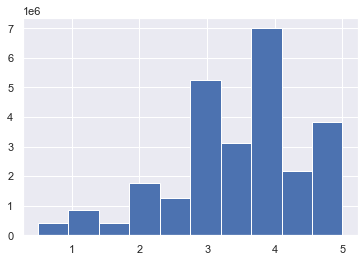

In [115]:
data.rating.hist()

In [116]:
columns_use.append(data.columns[2])

#### timestamp (X)

## Object dump

In [117]:
joblib.dump(columns_use, "./dataset/ratings_columns_use.pkl")
joblib.dump(columns_tbd, "./dataset/ratings_columns_tbd.pkl")

['./dataset/ratings_columns_tbd.pkl']

# ratings_small (X)

## Data 불러오기

In [118]:
data = pd.read_csv('./dataset/ratings_small.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## Data 훑어보기

In [119]:
data.shape

(100004, 4)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [121]:
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64